In [21]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np

# Load the uploaded CSV file
file_path = '/content/AB_Test_Results.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [22]:
# Check for null values in the dataset
null_values = data.isnull().sum()

null_values

,0
USER_ID,0
VARIANT_NAME,0
REVENUE,0


In [23]:
# Check for duplicate USER_IDs in the dataset
duplicate_count = data['USER_ID'].duplicated().sum()

duplicate_count

3676

In [24]:
# Calculate summary statistics for each group with duplicates
summary_stats = grouped_data.agg(['count', 'sum', 'mean', 'std']).reset_index()
summary_stats

,VARIANT_NAME,count,sum,mean,std
0,control,3132,397.72,0.126986,3.584689
1,variant,3192,232.04,0.072694,1.256534


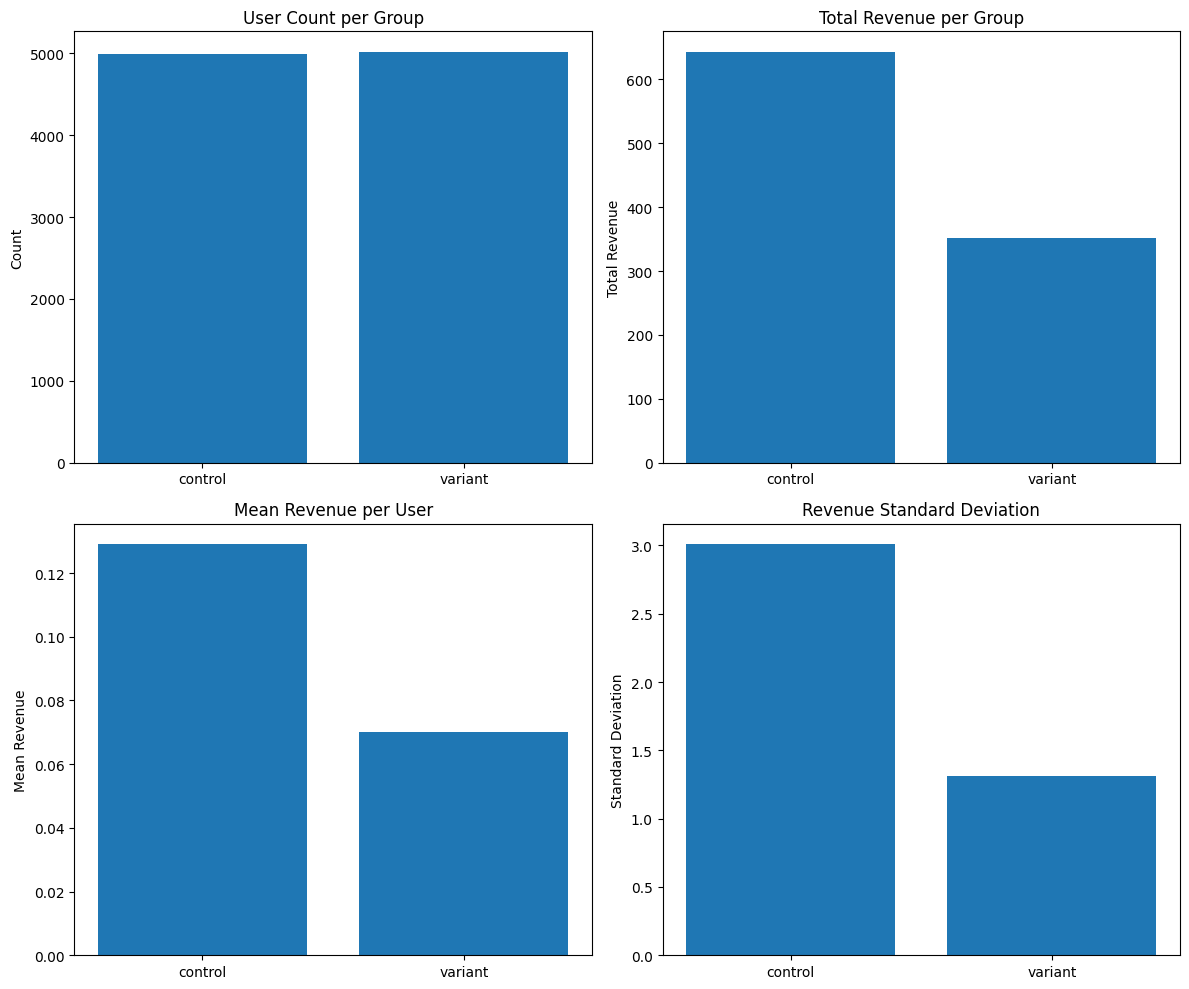

In [25]:
# Recreate the summary statistics with duplicates for visualization
summary_stats = data.groupby('VARIANT_NAME')['REVENUE'].agg(['count', 'sum', 'mean', 'std']).reset_index()

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot: Count
axes[0, 0].bar(summary_stats['VARIANT_NAME'], summary_stats['count'])
axes[0, 0].set_title('User Count per Group')
axes[0, 0].set_ylabel('Count')

# Plot: Total Revenue
axes[0, 1].bar(summary_stats['VARIANT_NAME'], summary_stats['sum'])
axes[0, 1].set_title('Total Revenue per Group')
axes[0, 1].set_ylabel('Total Revenue')

# Plot: Mean Revenue
axes[1, 0].bar(summary_stats['VARIANT_NAME'], summary_stats['mean'])
axes[1, 0].set_title('Mean Revenue per User')
axes[1, 0].set_ylabel('Mean Revenue')

# Plot: Standard Deviation
axes[1, 1].bar(summary_stats['VARIANT_NAME'], summary_stats['std'])
axes[1, 1].set_title('Revenue Standard Deviation')
axes[1, 1].set_ylabel('Standard Deviation')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
# Remove duplicate rows based on USER_ID, keeping the first occurrence
data_deduplicated = data.drop_duplicates(subset='USER_ID', keep='first')

# Confirm the number of rows after removing duplicates
rows_after_deduplication = data_deduplicated.shape[0]

rows_after_deduplication

6324

In [27]:
# Grouping data by variant name after removing duplicates
grouped_data_updated = data_deduplicated.groupby('VARIANT_NAME')['REVENUE']

# Calculate summary statistics for the deduplicated data
summary_stats_updated = grouped_data_updated.agg(['count', 'sum', 'mean', 'std']).reset_index()

summary_stats_updated

,VARIANT_NAME,count,sum,mean,std
0,control,3132,397.72,0.126986,3.584689
1,variant,3192,232.04,0.072694,1.256534


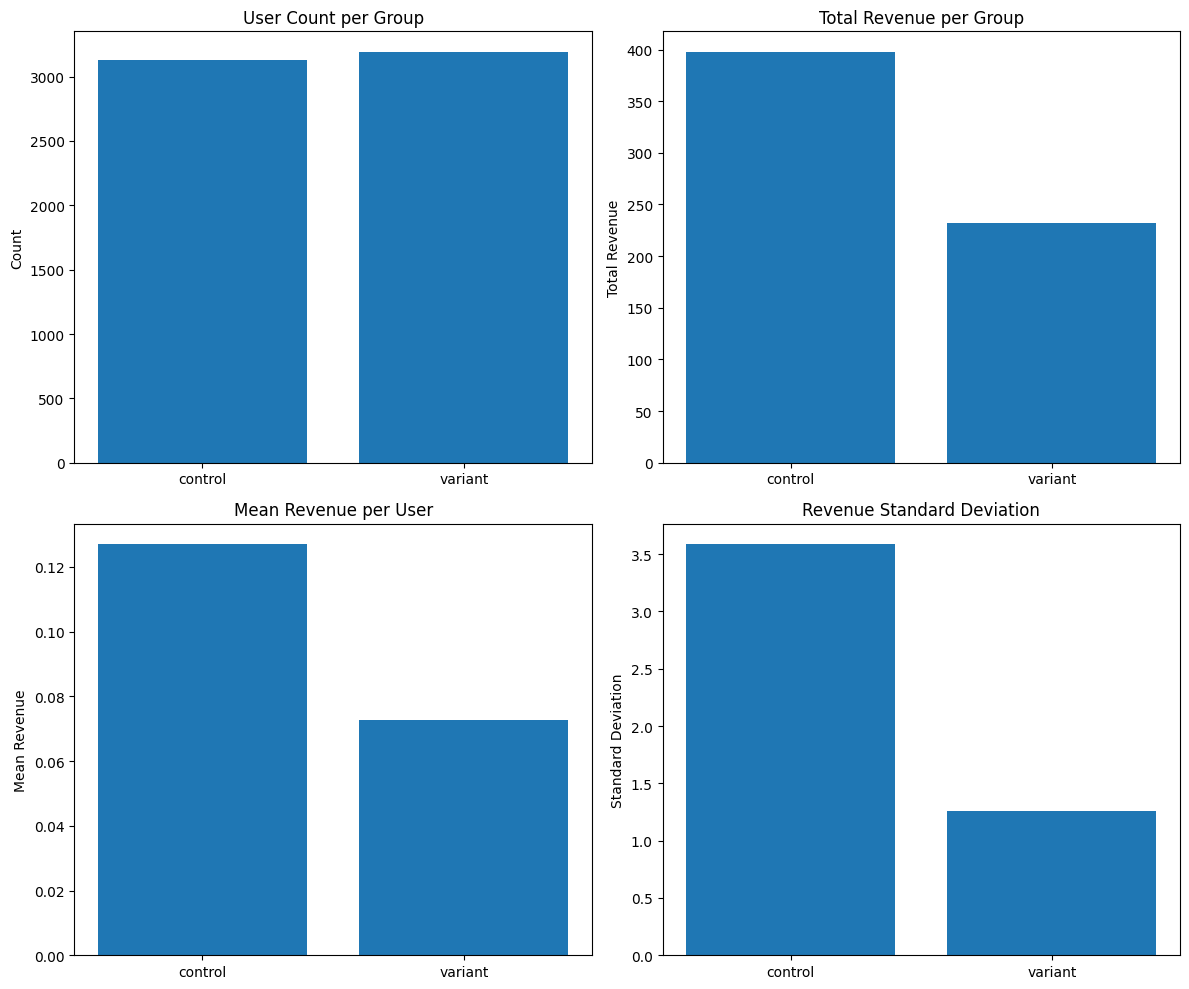

In [28]:
# Recreate the updated summary statistics for visualization
summary_stats_updated = data_deduplicated.groupby('VARIANT_NAME')['REVENUE'].agg(['count', 'sum', 'mean', 'std']).reset_index()

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot: Count
axes[0, 0].bar(summary_stats_updated['VARIANT_NAME'], summary_stats_updated['count'])
axes[0, 0].set_title('User Count per Group')
axes[0, 0].set_ylabel('Count')

# Plot: Total Revenue
axes[0, 1].bar(summary_stats_updated['VARIANT_NAME'], summary_stats_updated['sum'])
axes[0, 1].set_title('Total Revenue per Group')
axes[0, 1].set_ylabel('Total Revenue')

# Plot: Mean Revenue
axes[1, 0].bar(summary_stats_updated['VARIANT_NAME'], summary_stats_updated['mean'])
axes[1, 0].set_title('Mean Revenue per User')
axes[1, 0].set_ylabel('Mean Revenue')

# Plot: Standard Deviation
axes[1, 1].bar(summary_stats_updated['VARIANT_NAME'], summary_stats_updated['std'])
axes[1, 1].set_title('Revenue Standard Deviation')
axes[1, 1].set_ylabel('Standard Deviation')

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
# Grouping data by variant name
grouped_data = data_deduplicated.groupby('VARIANT_NAME')['REVENUE']

# Calculate summary statistics for each group
summary_stats_updated = grouped_data.agg(['count', 'sum', 'mean', 'std']).reset_index()

# Extract revenue data for statistical testing
control_revenue = data_deduplicated[data_deduplicated['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = data_deduplicated[data_deduplicated['VARIANT_NAME'] == 'variant']['REVENUE']

# Perform a t-test to compare the mean revenues of the two groups
t_stat, p_value = ttest_ind(control_revenue, variant_revenue, equal_var=False)

# Add t-test results to the summary
summary_stats['t_stat'] = t_stat
summary_stats['p_value'] = p_value

# Instead of using ace_tools, display the summary statistics using pandas directly
print("Summary Statistics for A/B Test Results:")
display(summary_stats)

Summary Statistics for A/B Test Results:


,VARIANT_NAME,count,sum,mean,std,t_stat,p_value
0,control,4984,643.00,0.129013,3.007524,0.80071,0.423349
1,variant,5016,351.47,0.070070,1.314802,0.80071,0.423349


In [30]:
# Define a function to calculate Cohen's d
def cohen_d(x, y):
    # Calculate the size of each group
    nx, ny = len(x), len(y)
    # Calculate the mean of each group
    mean_x, mean_y = np.mean(x), np.mean(y)
    # Calculate the variance of each group
    var_x, var_y = np.var(x, ddof=1), np.var(y, ddof=1)
    # Compute pooled standard deviation
    pooled_std = np.sqrt(((nx - 1) * var_x + (ny - 1) * var_y) / (nx + ny - 2))
    # Compute Cohen's d
    return (mean_x - mean_y) / pooled_std

# Calculate Cohen's d for the control and variant revenue data
effect_size = cohen_d(control_revenue, variant_revenue)
effect_size


0.020288418504792505

# Conclusion and Recommendation
The p-value (0.423) suggests that the difference in average revenue between the control and variant groups could be due to random chance. Similarly, Cohen's d effect size (0.0203) reinforces the conclusion from the p-value that there is no compelling evidence that the variant improves revenue compared to the control. This suggests a need to explore different changes or variants to achieve a more substantial impact. Despite the lack of statistical significance, the control group consistently generates higher total and average revenue than the variant group.

The recommentation based on the results would be to not implement the variant group changes based solely on this test, as there is no evidence it improves revenue. Additionally, consider redesigning the variant or testing other changes to identify an improvement. Further analysis or additional metrics might also help in understanding user behavior.